In [1]:
import pandas as pd
import numpy as np
import networkx as nx

# Load and Clean corpus
Load the corpus and introduce two additional states
* < S > ... the beginning of a setence
* < E > ... the end of a setence  

In [184]:
with open('corpus.txt') as f:
    corpus_raw = f.readlines()
    
corpus_clean = []
for l in corpus_raw:
    # Remove newline symbole
    if l[-1] == '\n':
        l = l[:-1]

    # Remove empty lines
    if l == '':
        continue
    
    # Remove end of line
    if l.startswith('<'):
        continue

    corpus_clean.append(l.split())
    
    # Add artifical setence end and start after .
    if l == '. . Fp 0':
        corpus_clean.append(['<E>', '<E>', '<E>', 0])
        corpus_clean.append(['<S>', '<S>', '<S>', 0])

# Add a artificial start at the beginning, and remove last element
corpus_clean.insert(0, ['<S>', '<S>', '<S>', 0])
corpus_clean.pop()
corpus_clean.pop()

# Convert the corpus into an pandas dataframe
corpus = pd.DataFrame(data=corpus_clean, columns=['token', 'lema', 'tag', 'content'])
    
corpus.head(15)

,token,lema,tag,content
0,<S>,<S>,<S>,0
1,Tristana,tristana,NP00000,0
2,es,ser,VSIP3S0,01775973
3,una,uno,DI0FS0,0
4,película,película,NCFS000,04960631
5,de,de,SPS00,0
6,el,el,DA0MS0,0
7,director,director,NCMS000,07063762
8,español,español,AQ0MS0,02727705
9,nacionalizado,nacionalizar,VMP00SM,00285796


# Transition Probabilities
Use the corpus to calculate transition probabilities between POS tags

It is read from **row** -> **column**

e.g.

S -> SPS00 = 0.4 ... means after the setence start there is a chance of 40% that the next tag is a SPS00
    

In [210]:
# Build table to transition probabilities
tags = corpus['tag']
utags = tags.unique()

# Generate empty table
tp = pd.DataFrame(columns=utags, index=utags, data=0)

# Add transition frequencies
for i, j in zip(tags[:-1], tags[1:]):
    tp.loc[i, j] = tp.loc[i, j] + 1

tp.head()

,<S>,NP00000,VSIP3S0,DI0FS0,NCFS000,SPS00,DA0MS0,NCMS000,AQ0MS0,VMP00SM,Fp,<E>,VAIP3S0,VMP00SF,DA0FS0,VSIS3S0,AQ0CS0,RN,AQ0FS0,Z,DP3CS0,AO0MS0,CC,VMIP3S0,CS,VSSP1S0,DI0MS0,Fc,VSN0000,PR0CN000,VMN0000,NCMN000,PI0CS000,NCFP000,DD0MS0,NCCS000,Fpa,Fpt,PR0CP000,PP3CSD00,RG,VMIC1S0,DI0FP0,PP3CNA00,Fe,P0000000,PR0CS000,DA0MP0,NCMP000,DA0NS0,VMIP3P0,VMIS3S0,VMII1S0,PI0MS000,Zu,VMSP1S0,Fx,PP3MS000,VMSI1S0,VAII1S0,DP3CP0,NCCP000,VMG0000,PP3MPA00,DD0CP0,VMP00PM,DI0MP0,AQ0MP0,VSII1S0,VMII3P0
<S>,0,3,0,0,0,6,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NP00000,0,0,1,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,7,0,0,0,6,0,0,0,0,0,0,0,0,2,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
VSIP3S0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DI0FS0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NCFS000,0,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Normalized transition probability matrix

In [211]:
# Normalize row wise
ntp = tp.div(tp.sum(axis=0), axis=0)
ntp.to_csv('transition_probabilities.csv')

# Remove the Transitions from end to start <E> -> <S>
ntp.loc['<E>', '<S>'] = 0.0

ntp.head()

,<S>,NP00000,VSIP3S0,DI0FS0,NCFS000,SPS00,DA0MS0,NCMS000,AQ0MS0,VMP00SM,Fp,<E>,VAIP3S0,VMP00SF,DA0FS0,VSIS3S0,AQ0CS0,RN,AQ0FS0,Z,DP3CS0,AO0MS0,CC,VMIP3S0,CS,VSSP1S0,DI0MS0,Fc,VSN0000,PR0CN000,VMN0000,NCMN000,PI0CS000,NCFP000,DD0MS0,NCCS000,Fpa,Fpt,PR0CP000,PP3CSD00,RG,VMIC1S0,DI0FP0,PP3CNA00,Fe,P0000000,PR0CS000,DA0MP0,NCMP000,DA0NS0,VMIP3P0,VMIS3S0,VMII1S0,PI0MS000,Zu,VMSP1S0,Fx,PP3MS000,VMSI1S0,VAII1S0,DP3CP0,NCCP000,VMG0000,PP3MPA00,DD0CP0,VMP00PM,DI0MP0,AQ0MP0,VSII1S0,VMII3P0
<S>,0.0,0.2,0.00000,0.000000,0.00,0.40000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.066667,0.0,0.0,0.066667,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.066667,0.066667,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.00000,0.200000,0.00000,0.0,0.0000,0.00000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NP00000,0.0,0.0,0.03125,0.000000,0.00,0.09375,0.0,0.0,0.0,0.000000,0.1250,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0625,0.218750,0.000000,0.0,0.0,0.1875,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.09375,0.0,0.03125,0.000000,0.03125,0.0,0.0000,0.03125,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VSIP3S0,0.0,0.0,0.00000,0.333333,0.00,0.00000,0.0,0.0,0.0,0.333333,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.00000,0.333333,0.00000,0.0,0.0000,0.00000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI0FS0,0.0,0.0,0.00000,0.000000,0.75,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.2500,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.00000,0.000000,0.00000,0.0,0.0000,0.00000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NCFS000,0.0,0.0,0.00000,0.000000,0.00,0.37500,0.0,0.0,0.0,0.000000,0.0625,0.0,0.000000,0.0,0.0,0.000000,0.0625,0.0625,0.0625,0.0,0.0,0.0,0.0625,0.000000,0.000000,0.0,0.0,0.0625,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.00000,0.000000,0.00000,0.0,0.0625,0.06250,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Emition Probabilities
Generate a table containing the probability that a given token coaccuras with a given word.

This is read from columns -> rows:

VSIP3S0 -> es : given VSIP3S0 100% of words are 'es'

NCPFS00 -> película : given NCPFS00, 12.5% of words are 'película'

In [212]:
unique_tokens = corpus.token.unique()

# Create empty emission probability matrix
ePM = pd.DataFrame(index=unique_tokens, columns=utags, data=0)

# Fill emission probability matrix
for token in unique_tokens:
    tags = corpus[corpus.token == token].tag.value_counts()
    for tag, n in tags.iteritems():
        ePM.loc[token, tag] = n
        
# Normalize the matrix column wise
nePM = ePM.div(ePM.sum(axis=0), axis=1)

In [213]:
ePM.to_csv('emission_frequencies.csv')
nePM.to_csv('emission_probabilities.csv')
nePM.head(15)

,<S>,NP00000,VSIP3S0,DI0FS0,NCFS000,SPS00,DA0MS0,NCMS000,AQ0MS0,VMP00SM,Fp,<E>,VAIP3S0,VMP00SF,DA0FS0,VSIS3S0,AQ0CS0,RN,AQ0FS0,Z,DP3CS0,AO0MS0,CC,VMIP3S0,CS,VSSP1S0,DI0MS0,Fc,VSN0000,PR0CN000,VMN0000,NCMN000,PI0CS000,NCFP000,DD0MS0,NCCS000,Fpa,Fpt,PR0CP000,PP3CSD00,RG,VMIC1S0,DI0FP0,PP3CNA00,Fe,P0000000,PR0CS000,DA0MP0,NCMP000,DA0NS0,VMIP3P0,VMIS3S0,VMII1S0,PI0MS000,Zu,VMSP1S0,Fx,PP3MS000,VMSI1S0,VAII1S0,DP3CP0,NCCP000,VMG0000,PP3MPA00,DD0CP0,VMP00PM,DI0MP0,AQ0MP0,VSII1S0,VMII3P0
<S>,1.0,0.00000,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tristana,0.0,0.03125,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
es,0.0,0.00000,1.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
una,0.0,0.00000,0.0,1.0,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
película,0.0,0.00000,0.0,0.0,0.125,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
de,0.0,0.00000,0.0,0.0,0.000,0.367647,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
el,0.0,0.00000,0.0,0.0,0.000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
director,0.0,0.00000,0.0,0.0,0.000,0.000000,0.0,0.027027,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
español,0.0,0.00000,0.0,0.0,0.000,0.000000,0.0,0.000000,0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nacionalizado,0.0,0.00000,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# POS Tag sentence
Pos Tag the sentence

**Habla de trasplantes con el enfermo grave.**

In [214]:
#sentence = 'Habla de trasplantes con el enfermo grave.'.split()

# Modify the sentence in order to fit corpus and nePM table
sentence = '<S> habla de trasplantes con el enfermo grave . <E>'.split()


## Simple single max search
Take the etiquete with the highest chance of corresponding to a word. (not taking into accoutn any world order or transition probability between etiquets)

In [215]:
pos_tags = [nePM.loc[w].idxmax() for w in sentence]
    
print(' '.join(sentence))
print('\nBecomes ...\n')

for w, tag in zip(sentence, pos_tags):
    print('%s|%s '% (w, tag), end='')

<S> habla de trasplantes con el enfermo grave . <E>

Becomes ...

<S>|<S> habla|VMIP3S0 de|SPS00 trasplantes|NCMP000 con|SPS00 el|DA0MS0 enfermo|AQ0MS0 grave|AQ0CS0 .|Fp <E>|<E> 

## Viterbi Algoritm

In [216]:
# Apply a laplace correction for missing transitions and emittions
nePM2 = nePM + 0.0001
ntp2 = ntp + 0.0001
table = [[(-np.log(1.0), '<S>', '')],]

for w in sentence[1:]:
    token_emp = np.log(nePM2.loc[w])
    
    prev_tags = table[-1]
    
    next_table = []
    # For each next tag, calculate its prop for the previous onces
    for next_tag in token_emp.index.values:
        
        prev_table = []
        for prev_tag_p, prev_tag, _ in prev_tags:
            # transition prop
            tp = np.log(ntp2.loc[prev_tag, next_tag])
            # emission prop
            ep = token_emp.loc[next_tag]
        
            next_tag_p = tp + ep + prev_tag_p
            prev_table.append((next_tag_p, next_tag, prev_tag))
        
        next_table.append(max(prev_table))
    table.append(next_table)

In [217]:
pos_tags = []

# Start not from the last, but from the one before the last, because we cannot handle '.' correctly
prev = max(table[-1])

for current in table[-2::-1]:
    pos_tags.append(prev[1])
    for t in current:
        if t[1] == prev[2]:
            prev = t
            break
pos_tags.append(prev[1])

In [218]:
for w, tag in zip(sentence, pos_tags[::-1]):
    print('%s|%s '% (w, tag), end='')

<S>|<S> habla|VMIP3S0 de|SPS00 trasplantes|NCMP000 con|SPS00 el|DA0MS0 enfermo|NCMS000 grave|AQ0CS0 .|Fp <E>|<E> 

In [219]:
relevant_tp = ntp.loc[pos_tags, pos_tags]
relevant_tp

,<E>,Fp,AQ0CS0,NCMS000,DA0MS0,SPS00,NCMP000,SPS00,VMIP3S0,<S>
<E>,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Fp,0.9375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AQ0CS0,0.0000,0.000000,0.000000,0.176471,0.000000,0.176471,0.000000,0.176471,0.000000,0.0
NCMS000,0.0000,0.054054,0.108108,0.000000,0.027027,0.378378,0.000000,0.378378,0.000000,0.0
DA0MS0,0.0000,0.000000,0.040000,0.600000,0.000000,0.040000,0.000000,0.040000,0.000000,0.0
SPS00,0.0000,0.000000,0.000000,0.044118,0.235294,0.000000,0.044118,0.000000,0.000000,0.0
NCMP000,0.0000,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.0
SPS00,0.0000,0.000000,0.000000,0.044118,0.235294,0.000000,0.044118,0.000000,0.000000,0.0
VMIP3S0,0.0000,0.000000,0.000000,0.037037,0.037037,0.259259,0.000000,0.259259,0.037037,0.0
<S>,0.0000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.400000,0.066667,0.0


# Graph of transition probabilitis
Generate a graph containing the transition probabilities of all tags contained in the sentence

In [220]:
G = nx.DiGraph()
[G.add_node(node) for node in relevant_tp.columns]
for src in relevant_tp.columns:
    for dest in relevant_tp.columns:
        w = ntp.loc[src, dest]
        if w > 0.0:
            G.add_edge(src, dest, label='%1.2f'%w)

In [221]:
# Write to disk and run dot -Tpng transition_graph.dot > transition_graph.png
nx.nx_agraph.write_dot(G, 'transition_graph.dot')

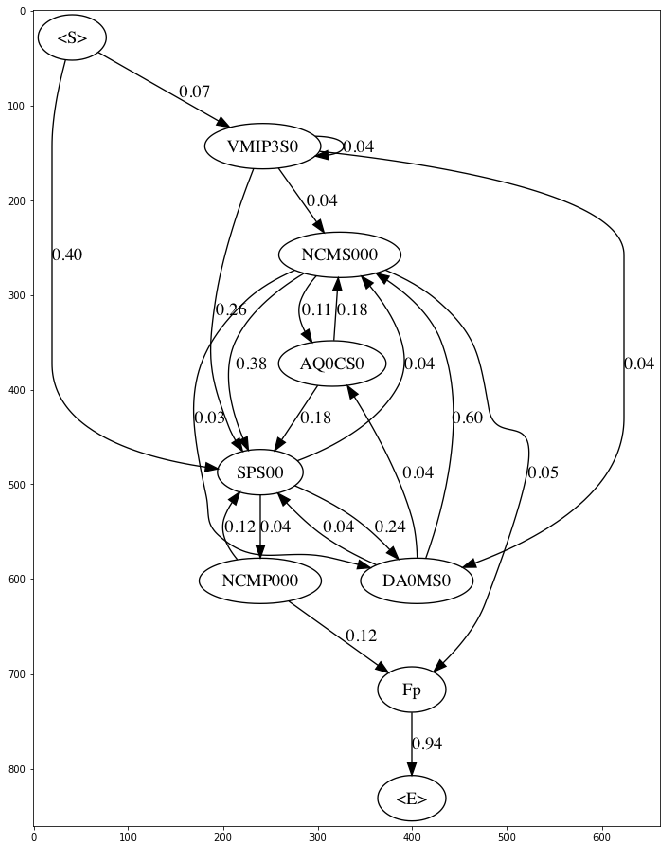

In [227]:
graph = plt.imread('transition_graph.png')
plt.figure(figsize=(15, 15))
plt.imshow(graph)
plt.show()